<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> X </font></center></h1>
<h2><center> <font color='black'> BDA - University of Tartu - Spring 2020</font></center></h3>
</div>

* This exam consists of two parts, please read everything carefully.


* Additionally, before each part there is a cell code **you should run before doing anything**, this cell will report the current timestamp.  

* Also, before submitting your solution, please **run the last cell that will report the end timestamp for your exam.**


In [1]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 02:18:34


#### Data set:

  1. The data set contains information about money spent on advertisements and their generated sales. Money was spent on TV, radio and newspaper ads.
  2. The `objective` is to understand how advertisement spending impacts sales.


In [2]:
# Resolve macOS 10.12.16 SSL error
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import pandas as pd
sheet_url = 'https://docs.google.com/spreadsheets/d/1iyva8AH2m2GEnBisaOBx_yaGZzRIk5v_0S3Z1I8I8_E/edit#gid=59247673'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(csv_export_url,)
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,188.0,191.1,28.7,18.2,17.3
1,37.0,266.9,43.8,5.0,25.4
2,138.0,273.7,28.9,59.7,20.8
3,116.0,75.1,35.0,52.7,12.6
4,102.0,296.4,36.3,100.9,23.8


# Part 1 (25 ponits):

* **In this part, you will have a specific business problem, and you need to do the following:** 

    1. You need to `identify the problem type`, e.g. supervised or unsupervised, as well as the `type of the supervised problem`. 
    2. Investigate the data to `decide if it has any problems`, e.g. imbalanced data, or it needs some cleaning before building a predictive model. 
    3. Try to `understand the data` either using descriptive analysis or using a proper visualization (e.g. scatter plot, box plot, heatmap, etc.), **but the most important thing is to conclude your understanding shortly**.
    4. `Build a predictive model` using a machine learning algorithm (e.g. random forest, XGBoost, etc.) that you would prefer. `Please report why you chose this algorithm specifically`. 
    5. `Train you model` on training data **(don't forget to set the seed to reproduce results.)**
    6. Use the trained model to `predict the unseen data`.
    7. `Evaluate the model` using at least **two different metrics** (e.g. AUC, LogLoos, etc.) that are relative to the problem that you defined at the beginning, and `compare them correctly`. `Which one you prefer to use and why?` 
    8. We may ask separate questions at each step. Please read everything carefully. 
    9. For **regression probelms**, don't forget to mention the regression equation either for simple or multiple linear regression as well as plotting the model equation to show how it can fit the data points. 

    
    
    

**<font color='red'>Answer:</font>**


### 1.1 Problem type: 




**<font color='blue'>Answer:</font>**
Supervised / Regression


### 1.2 Data preparation


In [4]:
#TODO
df = df.rename(columns={"Unnamed: 0": "X"})
df

,X,TV,radio,newspaper,sales
0,188.0,191.1,28.7,18.2,17.3
1,37.0,266.9,43.8,5.0,25.4
2,138.0,273.7,28.9,59.7,20.8
3,116.0,75.1,35.0,52.7,12.6
4,102.0,296.4,36.3,100.9,23.8
...,...,...,...,...,...
95,62.0,261.3,42.7,54.7,24.2
96,28.0,240.1,16.7,22.9,15.9
97,142.0,193.7,35.4,75.6,19.2
98,41.0,202.5,22.3,31.6,16.6


In [5]:
df.isnull().sum()

X            1
TV           1
radio        1
newspaper    1
sales        0
dtype: int64

In [6]:
# Mean Imputation
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

X            0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

### 1.3 Data understanding

In [7]:
#TODO
correlation = df.corr()
# print(correlation['SalePrice'].sort_values(ascending = False), '\n')
correlation[correlation['sales'] >= 0]['sales'].sort_values(ascending = False)



sales        1.000000
TV           0.735320
radio        0.632186
newspaper    0.133315
X            0.082230
Name: sales, dtype: float64

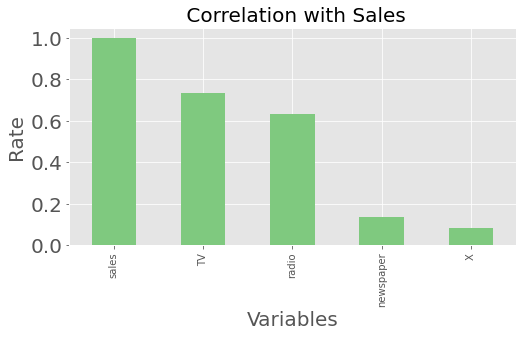

Correlations value: 
 sales        1.000000
TV           0.735320
radio        0.632186
newspaper    0.133315
X            0.082230
Name: sales, dtype: float64


In [8]:
#VISUALISATION
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(8,4))
plt.style.use('ggplot')
my_cmap = cm.get_cmap('Accent')

correlations = df.corr()['sales'].sort_values(ascending = False)
correlations.plot(kind='bar', cmap=my_cmap)

plt.title(' Correlation with Sales',fontsize=20)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Rate',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

print('Correlations value: \n', correlations.head(5))

- Top 3 features with highest correlation with `SalePrice`:
    - TV
    - radio
    - newspaper
- Correlation is positive
- When each of these 3 features got a change of value, the `sales` variable will change significantly

### 1.4 Build model

In [9]:
#TODO
# Import Library
from sklearn.model_selection import train_test_split # for data splitting
from sklearn.metrics import mean_squared_error # for model evaluation
from sklearn.metrics import r2_score # model evaluation
from sklearn.metrics import median_absolute_error # model evaluation
from sklearn.linear_model import LinearRegression

In [10]:
highest_corr_features = df[['sales','TV','radio', 'newspaper']]
# highest_corr_features.head()
corr = highest_corr_features.corr()
corr.style.background_gradient(cmap='Blues')

,sales,TV,radio,newspaper
sales,1.000000,0.735320,0.632186,0.133315
TV,0.735320,1.000000,0.192502,0.024611
radio,0.632186,0.192502,1.000000,0.323186
newspaper,0.133315,0.024611,0.323186,1.000000


In [12]:
import numpy as np
# drop our target variable
X = highest_corr_features.loc[:, highest_corr_features.columns != 'sales'] 

# our target variable that we need to predict
y = highest_corr_features[['sales']]

# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# make an instance from the lr model
lin_reg_mod = LinearRegression()

# train the model - teach the model
lin_reg_mod.fit(X_train, y_train)

# predict unseen data (test dat)
pred = lin_reg_mod.predict(X_test)


# Evaluate the LR model
# MAE
test_set_mae = median_absolute_error(y_test, pred)
# RMSE
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
#R^2
test_set_r2 = r2_score(y_test, pred)
#MSE
test_set_mse = (mean_squared_error(y_test, pred))

metric_values = [test_set_mse, test_set_rmse, test_set_mae,test_set_r2 ]
idx = ['MSE', 'RMSE', 'MAE', 'R2']
# pd.DataFrame(metric_values, index=idx)

df_mean = pd.DataFrame(metric_values, columns=['Using Mean Imputation'],index=idx)
df_mean

,Using Mean Imputation
MSE,2.333965
RMSE,1.527732
MAE,1.182081
R2,0.919797


In [13]:
## Calculate the values for MAE, RMSE, R^2 received before applying PCA

mae = 1.182081
rmse = 1.527732
r2 = 0.919797

### 1.5 Train your model

In [14]:
#TODO
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn

In [15]:
x = df.loc[:, df.columns != 'sales'] # features 
y = df[['sales']] # target / label

In [16]:
# features and target
X = x
y = y

# convert features to numpy array
X = X.to_numpy()

# n_components: Number of components (features) to keep.

# whiten: When True (False by default) the components_ vectors are multiplied by the square root of n_samples
# and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.

# svd (Singular Value Decomposition): project data to a lower dimensional space.

# get an instance from PCA
pca = PCA(n_components=3,whiten=True,svd_solver='randomized',random_state=0)

# fitting or teaching PCA 
pca = pca.fit(X)

# generate new features based on PCA technique by using transform()
dataPCA = pca.transform(X)

In [17]:
train_pca , test_pca, train_y_orig, test_y_orig = train_test_split(
        dataPCA,
        y,
        test_size=0.20,
        random_state=0)

### 1.6 Predict unseen data

In [18]:
#TODO
def get_mae(x_train, y_train, x_test,y_test):
    results={}
    
    def mae_model(clf):  
        # train the model - teach the model
        clf.fit(x_train, y_train)

        # predict unseen data (test dat)
        pred = clf.predict(x_test)

        # R2
        mae_val_score = median_absolute_error(y_test, pred)

        scores=[mae_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["MAE"]=mae_model(clf)

    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["MAE Score"] 
#     results.plot(kind="bar",title="Model Scores")
#     axes = plt.gca()
#     axes.set_ylim([0.05,0.1])
    return results

# PCA model
get_mae(train_pca, train_y_orig, test_pca,test_y_orig)

,MAE Score
MAE,1.28997


In [19]:
from sklearn import metrics
def get_rmse(x_train, y_train, x_test,y_test):
    results={}
    
    def rmse_model(clf):  
        # train the model - teach the model
        clf.fit(x_train, y_train)

        # predict unseen data (test dat)
        pred = clf.predict(x_test)

        # RMSE
        rmse_val_score = np.sqrt(mean_squared_error(y_test, pred))

        scores=[rmse_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["RMSE"]=rmse_model(clf)

    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["RMSE Score"] 
# #     results.plot(kind="bar",title="Model Scores")
# #     axes = plt.gca()
# #     axes.set_ylim([0.1,0.2])
    return results

# PCA model
get_rmse(train_pca, train_y_orig, test_pca,test_y_orig)

,RMSE Score
RMSE,2.86457


In [20]:
def get_r2(x_train, y_train, x_test,y_test):
    results={}
    
    def r2_model(clf):  
        # train the model - teach the model
        clf.fit(x_train, y_train)

        # predict unseen data (test dat)
        pred = clf.predict(x_test)

        # R2
        r2_val_score = r2_score(y_test, pred)

        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["R-square"]=r2_model(clf)

    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"]
#     results.plot(kind="bar",title="Model Scores")
#     axes = plt.gca()
#     axes.set_ylim([0.5,1])
    return results

# PCA model
get_r2(train_pca, train_y_orig, test_pca,test_y_orig)

,R Square Score
R-square,0.718021


In [21]:
## Calculate the values for MAE, RMSE, R^2 received after applying PCA

mae_pca = 1.28997
rmse_pca = 2.86457
r2_pca = 0.718021

In [22]:
#Reference: https://www.kaggle.com/dlarionov/feature-engineering-xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance

model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 10)

[0]	validation_0-rmse:11.06521	validation_1-rmse:10.09185
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:8.80864	validation_1-rmse:7.87967
[2]	validation_0-rmse:7.51252	validation_1-rmse:6.65623
[3]	validation_0-rmse:6.79131	validation_1-rmse:6.01949
[4]	validation_0-rmse:6.32802	validation_1-rmse:5.65257
[5]	validation_0-rmse:6.02610	validation_1-rmse:5.45802
[6]	validation_0-rmse:5.88672	validation_1-rmse:5.40083
[7]	validation_0-rmse:5.83534	validation_1-rmse:5.39459
[8]	validation_0-rmse:5.81029	validation_1-rmse:5.39881
[9]	validation_0-rmse:5.78718	validation_1-rmse:5.41287
[10]	validation_0-rmse:5.77979	validation_1-rmse:5.42226
[11]	validation_0-rmse:5.77213	validation_1-rmse:5.43986
[12]	validation_0-rmse:5.77260	validation_1-rmse:5.43827
[13]	validation_0-rmse:5.76939	validation_1-rmse:5.45309
[14]	validation_0-rmse:5.76879	validation_1-rmse:5.

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=300, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.8,
             tree_method=None, validate_parameters=False, verbosity=None)

### 1.7 Evaluate your model


In [23]:
#TODO
print("MAE difference after PCA: ", mae-mae_pca)
print("RMSE difference after PCA: ", rmse-rmse_pca)
print("R2 difference after PCA: ", r2-r2_pca)

MAE difference after PCA:  -0.10788900000000012
RMSE difference after PCA:  -1.336838
R2 difference after PCA:  0.20177599999999996


================================================================================================================

In [24]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 02:19:38


# Part 2 (15 points):

### **<font color='red'>This part of the exercise is task specific. You can choose to solve the problem A or B. Choose the one you feel more comfortable with.</font>**





# **<font color='red'> A. Uplift modelling </font>**

You have to deal with uplift modelling based on these steps:

1. Split the users in 4 categories, describe what each category represents and how many users belong to that category.

2. Calculate the uplift score for all the users (Using XGBoost or other predictors).

3. Use a visualization method of choice and visualize the uplift scores for all the users. List at least one conclusion that you can derive from the visualization.

4. Describe the marketing approaches that you would like to suggest for different levels of uplift. 


In [25]:
# !pip install chart_studio

In [26]:
# Library needed
from __future__ import division

from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

import sklearn
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import warnings
warnings.filterwarnings("ignore")

In [27]:
import pandas as pd
sheet_url = 'https://docs.google.com/spreadsheets/d/18qYsJlsbYT4uDuWIj3AdIHvKp2aGSPjkRaCzUfvitOQ/edit#gid=812678412'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
cs = pd.read_csv(csv_export_url, )
cs.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,19.488788,10.059654,8.214383,3.907662,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
1,21.499191,10.059654,8.214383,4.679882,10.280525,4.115453,-2.411115,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
2,22.250708,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,8.749045,4.679882,10.280525,4.115453,0.294443,4.833815,3.915574,13.190056,5.300375,-0.168679,1,0,0,0
4,24.304403,10.059654,8.860713,4.679882,10.280525,4.115453,-6.699321,4.833815,3.892853,13.190056,5.300375,-0.168679,1,0,0,0


### 2.1 User categorization

In [28]:
# cs.treatment.value_counts()
# cs.conversion.value_counts()
# cs.visit.value_counts()
# cs.exposure.value_counts()

In [29]:
# Create a target class
cs['target_class'] = 0 #CN (Lost Causes)
cs.loc[(cs.treatment == 0) & (cs.conversion > 0),'target_class'] = 1 #CR (Sure Things)
cs.loc[(cs.treatment == 1) & (cs.conversion == 0),'target_class'] = 2 #TN (Sleeping Dogs)
cs.loc[(cs.treatment == 1) & (cs.conversion > 0),'target_class'] = 3 #TR (Persuadables)
cs.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,target_class
0,19.488788,10.059654,8.214383,3.907662,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,2
1,21.499191,10.059654,8.214383,4.679882,10.280525,4.115453,-2.411115,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,2
2,22.250708,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,2
3,12.616365,10.059654,8.749045,4.679882,10.280525,4.115453,0.294443,4.833815,3.915574,13.190056,5.300375,-0.168679,1,0,0,0,2
4,24.304403,10.059654,8.860713,4.679882,10.280525,4.115453,-6.699321,4.833815,3.892853,13.190056,5.300375,-0.168679,1,0,0,0,2


In [30]:
cs.target_class.value_counts()

2    8508
0    1462
3      26
1       4
Name: target_class, dtype: int64

In [31]:
# in total counts
gr = ['CN', 'CR', "TN", "TR"]
i=0
for d in cs.target_class.value_counts():
  print(f"{gr[i]}: {d}\n")
  i+=1

CN: 8508

CR: 1462

TN: 26

TR: 4



In [32]:
# in percentage
gr = ['CN', 'CR', "TN", "TR"]
i=0
for d in cs.target_class.value_counts()/len(cs) * 100:
  print("{}: {}%\n".format(gr[i], np.round(d, 2)))
#   print(f"{gr[i]}: {d}%\n")
  i+=1

CN: 85.08%

CR: 14.62%

TN: 0.26%

TR: 0.04%



### 2.2 Uplift scores

In [33]:
#function for calculating the uplift
#assuming exposure as the segment to predict

def calc_uplift(df):
    avg_order_value = 25
    
    #calculate conversions for each segment type
    # base_conv = df[df.segment == 'No E-Mail']['conversion'].mean()
    base_conv = 0
    exp0_conv = df[df.exposure == 0]['conversion'].mean()
    exp1_conv = df[df.exposure == 1]['conversion'].mean()
    
    #calculate conversion uplift for discount and bogo
    exp0_conv_uplift = exp0_conv - base_conv   # uplift = treated - contolr
    exp1_conv_uplift = exp1_conv - base_conv   # uplift = treated - contolr
    
    #calculate order uplift
    exp0_order_uplift = exp0_conv_uplift * len(df[df.exposure == 0]['conversion'])
    exp1_order_uplift = exp1_conv_uplift * len(df[df.exposure == 1]['conversion'])
    
    #calculate revenue uplift
    exp0_rev_uplift = exp0_order_uplift * avg_order_value
    exp1_rev_uplift = exp1_order_uplift * avg_order_value
    
    if len(df[df.exposure == 0]['conversion']) > 0:
        print(f"Total Targeted Customer Count: {len(df[df.exposure == 0]['conversion'])}")
        print('Exposure 0 Conversion Uplift: {0}%'.format(np.round(exp0_conv_uplift*100,2))) # uplitf score %
        print('Exposure 0 Order Uplift: {0}'.format(np.round(exp0_order_uplift,2)))
        print('Exposure 0 Revenue Uplift: ${0}'.format(np.round(exp0_rev_uplift,2)))
        print("Revenue Uplift Per Targeted Customer: ${}\n".format(np.round(exp0_rev_uplift/len(df[df.exposure == 0]['conversion']), 2)))
#         print("Revenue Uplift Per Targeted Customer: { } \n}".forma)
    
    if len(df[df.exposure == 1]['conversion']) > 0:
        print('-------------- \n')
        print(f"Total Targeted Customer Count: { len(df[df.exposure == 1]['conversion'])}")
        print('Exposure 1 Conversion Uplift: {0}%'.format(np.round(exp1_conv_uplift*100,2))) # uplift sore
        print('Exposure 1 Order Uplift: {0}'.format(np.round(exp1_order_uplift,2)))
        print('Exposure 1 Revenue Uplift: ${0}'.format(np.round(exp1_rev_uplift,2)))
        print("Revenue Uplift Per Targeted Customer: ${}\n".format(np.round(exp1_rev_uplift/len(df[df.exposure == 1]['conversion']), 2)))
    

In [34]:
# cs

In [35]:
#creating a new dataframe as model and dropping columns that defines the label
df_model = cs.drop(['treatment','conversion','visit', 'exposure'],axis=1)
#convert categorical columns
# df_model = pd.get_dummies(df_model)

df_model.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,target_class
0,19.488788,10.059654,8.214383,3.907662,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,2
1,21.499191,10.059654,8.214383,4.679882,10.280525,4.115453,-2.411115,4.833815,3.971858,13.190056,5.300375,-0.168679,2
2,22.250708,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,2
3,12.616365,10.059654,8.749045,4.679882,10.280525,4.115453,0.294443,4.833815,3.915574,13.190056,5.300375,-0.168679,2
4,24.304403,10.059654,8.860713,4.679882,10.280525,4.115453,-6.699321,4.833815,3.892853,13.190056,5.300375,-0.168679,2


In [36]:
#create feature set and labels
X = df_model.drop(['target_class'],axis=1)
y = df_model.target_class

#splitting train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

#fitting the model and predicting the probabilities
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
class_probs = xgb_model.predict_proba(X_test)

In [37]:
gr = ['CN', 'CR', "TN", "TR"]
i=0
for d in class_probs[0]:
  print("{}: {:f}\n".format(gr[i], d))
#   print(f"{gr[i]}: {d}\n")
  i+=1

CN: 0.115070

CR: 0.000025

TN: 0.884886

TR: 0.000019



In [38]:
#probabilities for all customers
overall_proba = xgb_model.predict_proba(df_model.drop(['target_class'],axis=1))

#assign probabilities to 4 different columns
df_model['proba_CN'] = overall_proba[:,0] 
df_model['proba_CR'] = overall_proba[:,1] 
df_model['proba_TN'] = overall_proba[:,2] 
df_model['proba_TR'] = overall_proba[:,3]

#calculate uplift score for all customers
df_model['uplift_score'] = df_model.eval('proba_CN + proba_TR - proba_TN - proba_CR')

# #assign it back to main dataframe
cs['uplift_score'] = df_model['uplift_score']

In [39]:
cs

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,target_class,uplift_score
0,19.488788,10.059654,8.214383,3.907662,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,2,-0.839541
1,21.499191,10.059654,8.214383,4.679882,10.280525,4.115453,-2.411115,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,2,-0.640972
2,22.250708,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,2,-0.601409
3,12.616365,10.059654,8.749045,4.679882,10.280525,4.115453,0.294443,4.833815,3.915574,13.190056,5.300375,-0.168679,1,0,0,0,2,-0.765051
4,24.304403,10.059654,8.860713,4.679882,10.280525,4.115453,-6.699321,4.833815,3.892853,13.190056,5.300375,-0.168679,1,0,0,0,2,-0.918729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12.616365,10.059654,8.375016,4.679882,10.280525,4.115453,0.294443,4.833815,3.943716,18.380112,5.300375,-0.168679,1,0,0,0,2,-0.816393
9996,22.161953,10.059654,9.015944,4.679882,10.280525,4.115453,-11.589224,4.833815,3.874503,13.190056,5.300375,-0.168679,1,0,0,0,2,-0.831011
9997,23.667468,10.059654,8.214383,4.679882,10.280525,4.115453,-16.479126,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,2,-0.947601
9998,19.749193,10.059654,8.214383,3.359763,10.280525,4.115453,-2.411115,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0,0,-0.799719


### 2.3 Visualizing uplift score

In [40]:
calc_uplift(cs)

Total Targeted Customer Count: 9711
Exposure 0 Conversion Uplift: 0.15%
Exposure 0 Order Uplift: 15.0
Exposure 0 Revenue Uplift: $375.0
Revenue Uplift Per Targeted Customer: $0.04

-------------- 

Total Targeted Customer Count: 289
Exposure 1 Conversion Uplift: 5.19%
Exposure 1 Order Uplift: 15.0
Exposure 1 Revenue Uplift: $375.0
Revenue Uplift Per Targeted Customer: $1.3



### 2.4 Discussing uplift scores

In [41]:
df_lift = cs.copy()
uplift_q_75 = df_lift.uplift_score.quantile(0.75)

In [42]:
df_lift.visit.value_counts()

0    9509
1     491
Name: visit, dtype: int64

In [43]:
# Exposure = 0
df_target_cust = df_lift[(df_lift.exposure == 0) & (df_lift.uplift_score > uplift_q_75)].reset_index(drop=True)
target_cust = len(df_target_cust)
total_cust = df_lift[df_lift.exposure == 0].exposure.count()
ratio = target_cust / total_cust
print("Ratio of the customers targeted with Exposure 0 = {}%".format(np.round(ratio*100, 2)))

Ratio of the customers targeted with Exposure 0 = 25.3%


In [44]:
# Exposure = 1
df_target_cust = df_lift[(df_lift.exposure == 1) & (df_lift.uplift_score > uplift_q_75)].reset_index(drop=True)
target_cust = len(df_target_cust)
total_cust = df_lift[df_lift.exposure == 1].exposure.count()
ratio = target_cust / total_cust
print("Ratio of the customers targeted with Exposure 1 = {}%".format(np.round(ratio*100, 2)))

Ratio of the customers targeted with Exposure 1 = 12.8%


In [45]:
df_lift_exp0 = df_lift[(df_lift.exposure == 0) & (df_lift.uplift_score > uplift_q_75)].reset_index(drop=True)
calc_uplift(df_lift_exp0)

Total Targeted Customer Count: 2457
Exposure 0 Conversion Uplift: 0.33%
Exposure 0 Order Uplift: 8.0
Exposure 0 Revenue Uplift: $200.0
Revenue Uplift Per Targeted Customer: $0.08



In [46]:
df_lift_exp1 = df_lift[(df_lift.exposure == 1) & (df_lift.uplift_score > uplift_q_75)].reset_index(drop=True)
calc_uplift(df_lift_exp1)

-------------- 

Total Targeted Customer Count: 37
Exposure 1 Conversion Uplift: 40.54%
Exposure 1 Order Uplift: 15.0
Exposure 1 Revenue Uplift: $375.0
Revenue Uplift Per Targeted Customer: $10.14



**<font color='blue'>Answer:</font>**

 - The results is giving rising performance
  - **Revenue uplift per targeted customer** for **Exposure = 0** is getting 2.5x better (0.1 / 0.04)
  - For **Exposure = 1** is getting 3.3x better (4.28 / 1.3)

 - By using this model, we can make our campaign more efficient by:
    - Targeting specific segments (in this case, I'm using `exposure` variable) based on the uplift score
    - Trying different offers based on customer’s uplift score
    - Demonstrate 80/20 rules that small proportion of customers make most of the revenue

[Reference](https://towardsdatascience.com/uplift-modeling-e38f96b1ef60)

# **<font color='red'> B. Customer Segmentation</font>**

You have to deal with customer segmentation based on these steps

1. Calculate the Recency, Frequency and Monetary value for each customer and split them in four bins.

2. Calculate a total score for the customers based on Recency, Frequency and Monetary value.

3. Build a 3D graph where axes represent the R, F and, M values and the hue (color of shade) represents the score.

4. Describe the insights that you receive from the graph and the suggestions that you would like to give to the company about the customer segments

In [ ]:
import pandas as pd
sheet_url = 'https://docs.google.com/spreadsheets/d/12MHW04zmS7-k3Qq8iN6HVTEMjFzmpxCyIK-Yw9FJTCE/edit#gid=1079074860'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
cs = pd.read_csv(csv_export_url,)
cs.head()

### 2.1 RFM bins: 


### 2.2 RFM score

### 2.3 RFM visualization

### 2.4 RFM discussions

**<font color='blue'>Answer:</font>**


In [ ]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)